In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from scipy import stats



In [2]:
#Procedemos a extraer el listado total de token provisto por la API

url = 'https://api.coingecko.com/api/v3/coins/list'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df_tokens = pd.DataFrame(data)
else:
    print('Error al obtener los datos')

In [3]:
df_tokens.columns

Index(['id', 'symbol', 'name'], dtype='object')

In [4]:
df_tokens.head()

id symbol                       name
0                    01coin    zoc                     01coin
1                    0chain    zcn                        Zus
2             0vix-protocol    vix              0VIX Protocol
3                        0x    zrx                0x Protocol
4  0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract

In [5]:
df_tokens["symbol"].unique()
#len(simbolos)
#df.head()

array(['zoc', 'zcn', 'vix', ..., 'zyr', 'zyx', 'zzz'], dtype=object)

###Procedemos a definir los tokens que han sido seleccionados a priori para desarrollar el analisis.

In [6]:
#Luego de decidir cuales token seleccionamos en funcion de dos criterios, Token mas conocidos y luego, tokens asociados a resistencia en el mercado.
#Procedemos entonces a listar los simbolos y ids de cada token a trabajar.
id_coins = ["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
simbolo_coin = [ str(df_tokens[df_tokens["id"] == id_coins[0]]["symbol"].values[0]),
                 df_tokens[df_tokens["id"] == id_coins[1]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[2]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[3]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[4]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[5]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[6]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[7]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[8]]["symbol"].values[0],
                 df_tokens[df_tokens["id"] == id_coins[9]]["symbol"].values[0]]


In [7]:
#Lista de simbolos de los datos extraidos de la data 
simbolo_coin


['btc', 'eth', 'axs', 'theta', 'bnb', 'trx', 'ada', 'xrp', 'ltc', 'bch']

###GENERACION DE DATAFRAMES CON DATOS DE CADA TOKEN. UN DATAFRAME POR CADA TOKEN. 

Tengase en cuenta que al ejecutar el procedimiento a continuacion no se establecen rangos de fecha, la solicitud se realiza en la cantidad de dias requeridos a partir de la fecha actual.

In [8]:
#Se extrae por df los datos desde la api, segun los parametros provistos (moneda, dias de informacion, decimales por dato).
var_dias = str(365*3)
decimales = "4"
lista_df = []
lista_n_df = []

print("cargando "+id_coins[0])
moneda = id_coins[0]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_bitcoin = pd.DataFrame(data)
    lista_n_df.append("df_bitcoin")
    lista_df.append(df_bitcoin)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[1])
moneda = id_coins[1]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_ethereum = pd.DataFrame(data)
    lista_n_df.append("df_ethereum")
    lista_df.append(df_ethereum)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[2])
moneda = id_coins[2]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_axie = pd.DataFrame(data)
    lista_n_df.append("df_axie")
    lista_df.append(df_axie)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[3])
moneda = id_coins[3]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_theta = pd.DataFrame(data)
    lista_n_df.append("df_theta")
    lista_df.append(df_theta)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[4])
moneda = id_coins[4]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_bnb = pd.DataFrame(data)
    lista_n_df.append("df_bnb")
    lista_df.append(df_bnb)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[5])
moneda = id_coins[5]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_tron = pd.DataFrame(data)
    lista_n_df.append("df_tron")
    lista_df.append(df_tron)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[6])
moneda = id_coins[6]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_cardano = pd.DataFrame(data)
    lista_n_df.append("df_cardano")
    lista_df.append(df_cardano)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[7])
moneda = id_coins[7]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_ripple = pd.DataFrame(data)
    lista_n_df.append("df_ripple")
    lista_df.append(df_ripple)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[8])
moneda = id_coins[8]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_litecoin = pd.DataFrame(data)
    lista_n_df.append("df_litecoin")
    lista_df.append(df_litecoin)
else:
    print("Error al obtener los datos de "+moneda)

print("cargando "+id_coins[9])
moneda = id_coins[9]
url = "https://api.coingecko.com/api/v3/coins/"+moneda+"/market_chart?vs_currency=usd&days="+var_dias+"&interval=daily&precision="+decimales
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df_bitcoin_cash = pd.DataFrame(data)
    lista_n_df.append("df_bitcoin_cash")
    lista_df.append(df_bitcoin_cash)
else:
    print("Error al obtener los datos de "+moneda)

cargando bitcoin
cargando ethereum
cargando axie-infinity
cargando theta-token
cargando binancecoin
cargando tron
cargando cardano
cargando ripple
cargando litecoin
cargando bitcoin-cash


In [9]:
#Procedemos a incorporar el "dia" como una columna adicional a la informacion extraida.
lista_df[0]["dia"] = lista_df[0].index
lista_df[1]["dia"] = lista_df[1].index
lista_df[2]["dia"] = lista_df[2].index
lista_df[3]["dia"] = lista_df[3].index
lista_df[4]["dia"] = lista_df[4].index
lista_df[5]["dia"] = lista_df[5].index
lista_df[6]["dia"] = lista_df[6].index
lista_df[7]["dia"] = lista_df[7].index
lista_df[8]["dia"] = lista_df[8].index
lista_df[9]["dia"] = lista_df[9].index

In [10]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[0])
lista_df[0].head()

df_bitcoin


prices                          market_caps   
0  [1597622400000, 11901.7765]  [1597622400000, 219750735622.69547]  \
1  [1597708800000, 12272.4658]   [1597708800000, 226536103501.8635]   
2   [1597795200000, 11949.611]  [1597795200000, 220980135332.21396]   
3   [1597881600000, 11733.279]   [1597881600000, 216660276172.5052]   
4  [1597968000000, 11861.8366]  [1597968000000, 219044968220.88754]   

                         total_volumes  dia  
0   [1597622400000, 19209711614.40851]    0  
1  [1597708800000, 25481896190.555748]    1  
2  [1597795200000, 24825715158.705486]    2  
3  [1597881600000, 23384200655.888924]    3  
4  [1597968000000, 20353349054.591465]    4

In [11]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[1])
lista_df[1].head()

df_ethereum


prices                          market_caps   
0  [1597622400000, 433.4319]   [1597622400000, 48635333662.57019]  \
1  [1597708800000, 430.0325]   [1597708800000, 48259667903.08671]   
2  [1597795200000, 422.1067]   [1597795200000, 47400903599.29812]   
3  [1597881600000, 406.5745]  [1597881600000, 45642757811.590775]   
4  [1597968000000, 416.4698]   [1597968000000, 46754739209.41609]   

                         total_volumes  dia  
0  [1597622400000, 12680404379.026093]    0  
1    [1597708800000, 11697848303.8365]    1  
2  [1597795200000, 12062999738.137259]    2  
3  [1597881600000, 12854733824.945929]    3  
4  [1597968000000, 10564357237.821798]    4

In [12]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[2])
lista_df[2].head()

df_axie


prices                          market_caps   
0  [1604448000000, 0.1457]  [1604448000000, 7754755.6201303415]  \
1  [1604534400000, 0.1457]  [1604534400000, 7754755.6201303415]   
2  [1604620800000, 0.1349]   [1604620800000, 7257184.758105823]   
3   [1604707200000, 0.143]   [1604707200000, 7678065.071288265]   
4   [1604793600000, 0.142]   [1604793600000, 7658840.346562262]   

                         total_volumes  dia  
0  [1604448000000, 18855236.284391005]    0  
1  [1604534400000, 18855236.284391005]    1  
2   [1604620800000, 5718029.633174498]    2  
3   [1604707200000, 3529225.764326668]    3  
4   [1604793600000, 2744359.084207642]    4

In [13]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[3])
lista_df[3].head()

df_theta


prices                         market_caps   
0  [1597622400000, 0.3962]  [1597622400000, 395725155.4476066]  \
1  [1597708800000, 0.3859]  [1597708800000, 386475619.4715792]   
2  [1597795200000, 0.4375]  [1597795200000, 439592566.8982361]   
3  [1597881600000, 0.4067]  [1597881600000, 406741582.0645047]   
4  [1597968000000, 0.4549]  [1597968000000, 456621032.6871017]   

                         total_volumes  dia  
0   [1597622400000, 40917327.46290021]    0  
1   [1597708800000, 40283381.05504332]    1  
2   [1597795200000, 74860604.80809869]    2  
3  [1597881600000, 64771115.696783565]    3  
4  [1597968000000, 45037984.750671834]    4

In [14]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[4])
lista_df[4].head()

df_bnb


prices                          market_caps   
0  [1597622400000, 23.4747]    [1597622400000, 3473865123.87327]  \
1  [1597708800000, 23.5263]   [1597708800000, 3476788975.014206]   
2  [1597795200000, 22.9738]  [1597795200000, 3397690721.6801467]   
3  [1597881600000, 22.3076]  [1597881600000, 3302382351.2778296]   
4  [1597968000000, 23.0726]   [1597968000000, 3414255884.599508]   

                         total_volumes  dia  
0  [1597622400000, 284809741.52866864]    0  
1  [1597708800000, 280196303.51109457]    1  
2   [1597795200000, 271410617.3488436]    2  
3  [1597881600000, 240981711.80246103]    3  
4  [1597968000000, 253331918.21161318]    4

In [15]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[5])
lista_df[5].head()

df_tron


prices                          market_caps   
0  [1597622400000, 0.0281]  [1597622400000, 2004829141.3802955]  \
1  [1597708800000, 0.0304]    [1597708800000, 2177322276.44678]   
2  [1597795200000, 0.0287]  [1597795200000, 2056165352.3217645]   
3  [1597881600000, 0.0265]  [1597881600000, 1894966987.0383775]   
4  [1597968000000, 0.0275]  [1597968000000, 1973679998.8806942]   

                         total_volumes  dia  
0  [1597622400000, 1048206012.9184842]    0  
1  [1597708800000, 1205602497.4715855]    1  
2  [1597795200000, 1369923734.1154535]    2  
3  [1597881600000, 1284389744.9421294]    3  
4   [1597968000000, 929538066.1449765]    4

In [16]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[6])
lista_df[6].head()

df_cardano


prices                          market_caps   
0  [1597622400000, 0.1388]   [1597622400000, 4317442465.172292]  \
1  [1597708800000, 0.1407]   [1597708800000, 4373590696.612064]   
2   [1597795200000, 0.137]  [1597795200000, 4251110381.6482053]   
3  [1597881600000, 0.1294]  [1597881600000, 4031820062.1498275]   
4  [1597968000000, 0.1342]   [1597968000000, 4121466418.821199]   

                         total_volumes  dia  
0  [1597622400000, 412928069.04203683]    0  
1   [1597708800000, 550014396.0623504]    1  
2  [1597795200000, 489748686.65121776]    2  
3   [1597881600000, 490727213.1136873]    3  
4    [1597968000000, 410697982.498588]    4

In [17]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[7])
lista_df[7].head()

df_ripple


prices                          market_caps   
0  [1597622400000, 0.3033]  [1597622400000, 13623503827.413843]  \
1  [1597708800000, 0.3146]  [1597708800000, 14132765558.945097]   
2   [1597795200000, 0.303]  [1597795200000, 13616539460.561516]   
3  [1597881600000, 0.2901]  [1597881600000, 13039045107.718191]   
4  [1597968000000, 0.2923]  [1597968000000, 13121088346.449871]   

                         total_volumes  dia  
0   [1597622400000, 2521984969.298177]    0  
1  [1597708800000, 3420857738.9387383]    1  
2  [1597795200000, 2727046213.8384895]    2  
3  [1597881600000, 2493335942.2243185]    3  
4  [1597968000000, 2370638516.8312345]    4

In [18]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[8])
lista_df[8].head()

df_litecoin


prices                          market_caps   
0  [1597622400000, 63.7516]   [1597622400000, 4159129364.939645]  \
1  [1597708800000, 67.1442]   [1597708800000, 4382021886.572505]   
2  [1597795200000, 65.4357]  [1597795200000, 4278578439.1378984]   
3  [1597881600000, 61.9846]   [1597881600000, 4046064926.889311]   
4  [1597968000000, 62.8792]  [1597968000000, 4108057993.8320065]   

                         total_volumes  dia  
0   [1597622400000, 3504667048.359871]    0  
1  [1597708800000, 4023208949.8595133]    1  
2   [1597795200000, 3663784454.302389]    2  
3    [1597881600000, 3275367623.55599]    3  
4  [1597968000000, 2803148157.0237627]    4

In [19]:
#["bitcoin","ethereum","axie-infinity","theta-token","binancecoin","tron","cardano","ripple","litecoin","bitcoin-cash"]
print(lista_n_df[9])
lista_df[9].head()

df_bitcoin_cash


prices                          market_caps   
0  [1597622400000, 307.9558]  [1597622400000, 5694633023.3736725]  \
1  [1597708800000, 317.8197]   [1597708800000, 5878197399.877032]   
2  [1597795200000, 303.8126]   [1597795200000, 5626388271.091202]   
3  [1597881600000, 292.2607]   [1597881600000, 5406921044.245592]   
4   [1597968000000, 294.309]   [1597968000000, 5437205122.038773]   

                         total_volumes  dia  
0   [1597622400000, 3152509870.365695]    0  
1  [1597708800000, 3452556433.3721037]    1  
2    [1597795200000, 3165586546.05539]    2  
3  [1597881600000, 3031783849.7329955]    3  
4  [1597968000000, 2633518896.1457033]    4

In [20]:
coin_precio = ["precio_btc","precio_eth","precio_axs","precio_theta","precio_bnb","precio_tron","precio_cardano","precio_ripple","precio_ltc","precio_bch"]


###Procedemos a extraer los datos de capitalizacion, volumen y precio del formato estructurado origen provisto por la API.

In [21]:
#Procedemos a extraer el precio desde la extructura origen en el campo "prices" y lo agregamos en una nueva columna llamada "precio"
for j in range(0,len(coin_precio)):
    lista_df[j]["precio"] = 0
    lista_df[j]["token"] = simbolo_coin[j]
    for i in range(0,len(lista_df[j]["prices"])):
        lista_df[j]["precio"][i] = lista_df[j]["prices"][i][1]


C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\2996226723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[j]["precio"][i] = lista_df[j]["prices"][i][1]
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\2996226723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[j]["precio"][i] = lista_df[j]["prices"][i][1]
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\2996226723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [22]:
#Extraemos del mismo modo que como se hizo con el precio, la capitalizacion.
for j in range(0,len(coin_precio)):
    lista_df[j]["Capitalizacion"] = 0
    for i in range(0,len(lista_df[j]["market_caps"])):
        lista_df[j]["Capitalizacion"][i] = lista_df[j]["market_caps"][i][1]

C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\3627392913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[j]["Capitalizacion"][i] = lista_df[j]["market_caps"][i][1]
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\3627392913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[j]["Capitalizacion"][i] = lista_df[j]["market_caps"][i][1]
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\3627392913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [23]:
#Finalmente extraemos el volumen.
for j in range(0,len(coin_precio)):
    lista_df[j]["Volumen"] = 0
    for i in range(0,len(lista_df[j]["total_volumes"])):
        lista_df[j]["Volumen"][i] = lista_df[j]["total_volumes"][i][1]

C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\1066026564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[j]["Volumen"][i] = lista_df[j]["total_volumes"][i][1]
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\1066026564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[j]["Volumen"][i] = lista_df[j]["total_volumes"][i][1]
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\1066026564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

###Filtramos las columnas utiles a efectos del proceso de datos que continua.

In [24]:
#Procedemos a desechar las columnas originales extraidas de la API y nos quedamos con la columnas generadas.
for i in range(0,len(lista_df)):
    lista_df[i] = lista_df[i][["dia","token","precio","Capitalizacion","Volumen"]]


In [25]:
lista_df[1].head(-5)

dia token     precio  Capitalizacion       Volumen
0        0   eth   433.4319    4.863533e+10  1.268040e+10
1        1   eth   430.0325    4.825967e+10  1.169785e+10
2        2   eth   422.1067    4.740090e+10  1.206300e+10
3        3   eth   406.5745    4.564276e+10  1.285473e+10
4        4   eth   416.4698    4.675474e+10  1.056436e+10
...    ...   ...        ...             ...           ...
1086  1086   eth  1826.9335    2.194228e+11  7.660233e+09
1087  1087   eth  1856.8441    2.231113e+11  7.498117e+09
1088  1088   eth  1855.8907    2.229924e+11  6.010104e+09
1089  1089   eth  1850.8770    2.224113e+11  3.733538e+09
1090  1090   eth  1847.5418    2.220194e+11  3.694817e+09

[1091 rows x 5 columns]

In [26]:
df_precios = ["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]

###Se procede a agregar una columna adicional normalizando el precio de cada token a una escala de 0-100. Esto con la finalidad de minimizar la posibilidad de sesgo en los proximos diagramas de dispersion que estaremos generando entre los precios de pares de tokens.

In [27]:
#Procedemos a agregar una nueva columna en la cual se imputara el precio "normalizado" con base a la escala 0 - 100.

for i in range(0,len(lista_df)):
    lista_df[i]["precio_n"] = lista_df[i]["precio"] * (100 / lista_df[i]["precio"].sum())


C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\2732608454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[i]["precio_n"] = lista_df[i]["precio"] * (100 / lista_df[i]["precio"].sum())
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\2732608454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[i]["precio_n"] = lista_df[i]["precio"] * (100 / lista_df[i]["precio"].sum())
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\2732608454.py:4: SettingWithCopyWarning: 
A

In [28]:
lista_df[1].head()

dia token    precio  Capitalizacion       Volumen  precio_n
0    0   eth  433.4319    4.863533e+10  1.268040e+10  0.019653
1    1   eth  430.0325    4.825967e+10  1.169785e+10  0.019499
2    2   eth  422.1067    4.740090e+10  1.206300e+10  0.019139
3    3   eth  406.5745    4.564276e+10  1.285473e+10  0.018435
4    4   eth  416.4698    4.675474e+10  1.056436e+10  0.018884

In [29]:
#Procedemos a contar los registros generados por token.
print(simbolo_coin)
longitud_dfs = [df_bitcoin["dia"].count(),df_ethereum["dia"].count(),df_axie["dia"].count(),df_theta["dia"].count(),df_bnb["dia"].count(),
df_tron["dia"].count(),df_cardano["dia"].count(),df_ripple["dia"].count(),df_litecoin["dia"].count(),df_bitcoin_cash["dia"].count()]
longitud_dfs

['btc', 'eth', 'axs', 'theta', 'bnb', 'trx', 'ada', 'xrp', 'ltc', 'bch']


[1096, 1096, 1017, 1096, 1096, 1096, 1096, 1096, 1096, 1096]

IMPORTANTE TENER EN CUENTA QUE CON LA INSTRUCCION ANTERIOR EVIDENCIAMOS QUE EL TOKEN AXS TIENE UN CICLO DE EXISTENCIA MENOS A TRES AÑOS.

###Procedemos a generar algunos datos importantes en nuevas columnas. Todos ellos con la finalidad de poder desarrolalr calculos o comparaciones estadisticas. Maximos, Minimo, Prmedios, Porcentales, correlacion, entre otros.

In [30]:
# Antes de concatenar, procedemos a extraer dos datos importantes, a efectos de generar dos columnas temporales

for i in range(0,len(lista_df)):
    lista_df[i]["precio_max"] = lista_df[i]["precio"].max()
    lista_df[i]["precio_min"] = lista_df[i]["precio"].min()
    lista_df[i]["precio_prom"] = lista_df[i]["precio"].mean()

C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\3405225663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[i]["precio_max"] = lista_df[i]["precio"].max()
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\3405225663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_df[i]["precio_max"] = lista_df[i]["precio"].max()
C:\Users\Elio Padilla\AppData\Local\Temp\ipykernel_19376\3405225663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [31]:
#Correlacion del precio versus tiempo en una nueva columna.
corr_cap_precio = []
corr_dia_precio = []
for i in range(0,len(lista_df)):
    corr_cap_precio.append(lista_df[i][["Capitalizacion","precio"]].corr())
    corr_dia_precio.append(lista_df[i][["dia","precio"]].corr())
for i in range(0,len(lista_df)):
    lista_df[i]["Corr_Cap_Pr"] = corr_cap_precio[i]['Capitalizacion']['precio']
    lista_df[i]["Corr_dia_Pr"] = corr_dia_precio[i]["precio"]["dia"]

In [32]:
lista_df[0].head()

dia token      precio  Capitalizacion       Volumen  precio_n  precio_max   
0    0   btc  11901.7765    2.197507e+11  1.920971e+10  0.033338  67617.0155  \
1    1   btc  12272.4658    2.265361e+11  2.548190e+10  0.034376  67617.0155   
2    2   btc  11949.6110    2.209801e+11  2.482572e+10  0.033472  67617.0155   
3    3   btc  11733.2790    2.166603e+11  2.338420e+10  0.032866  67617.0155   
4    4   btc  11861.8366    2.190450e+11  2.035335e+10  0.033226  67617.0155   

   precio_min   precio_prom  Corr_Cap_Pr  Corr_dia_Pr  
0   10125.015  32573.390215     0.999606    -0.219804  
1   10125.015  32573.390215     0.999606    -0.219804  
2   10125.015  32573.390215     0.999606    -0.219804  
3   10125.015  32573.390215     0.999606    -0.219804  
4   10125.015  32573.390215     0.999606    -0.219804

In [33]:
#Concatenamos todos los df independientes por token, a fin de obtener un unico df con datos de todos los tokens.
df_monedas = pd.concat([lista_df[0],
 lista_df[1],
 lista_df[2],
 lista_df[3],
 lista_df[4],
 lista_df[5],
 lista_df[6],
 lista_df[7],
 lista_df[8],
 lista_df[9]])


In [34]:
df_monedas[df_monedas["token"] == "axs"].head()

dia token  precio  Capitalizacion       Volumen  precio_n  precio_max   
0    0   axs  0.1457    7.754756e+06  1.885524e+07  0.000504    159.7612  \
1    1   axs  0.1457    7.754756e+06  1.885524e+07  0.000504    159.7612   
2    2   axs  0.1349    7.257185e+06  5.718030e+06  0.000467    159.7612   
3    3   axs  0.1430    7.678065e+06  3.529226e+06  0.000495    159.7612   
4    4   axs  0.1420    7.658840e+06  2.744359e+06  0.000491    159.7612   

   precio_min  precio_prom  Corr_Cap_Pr  Corr_dia_Pr  
0      0.1349    28.415694     0.989958    -0.167732  
1      0.1349    28.415694     0.989958    -0.167732  
2      0.1349    28.415694     0.989958    -0.167732  
3      0.1349    28.415694     0.989958    -0.167732  
4      0.1349    28.415694     0.989958    -0.167732

###Generamos un dataframe adicional con la finalidad de concentrar datos especificos y utiles con los cuales poder calcular parametros en alguna otra herramienta externa. Dicho dataframe solo registrara el ultimo dato de precio, capitalizacion y volumen del dataset extraido.

In [35]:
#Luego que tenemos la data completa, extraemos el ultimo registro de cada token, esto con el fin de obtener el ultimo dato de precio y demas atributos
ult_reg = []
for i in range(0,len(lista_df)):
    max_dia = lista_df[i]["dia"].max()
    ult_reg.append(lista_df[i][lista_df[i]["dia"] == max_dia])

In [36]:
ult_reg[1]


dia token     precio  Capitalizacion       Volumen  precio_n   
1095  1095   eth  1819.9204    2.189063e+11  5.434107e+09  0.082519  \

      precio_max  precio_min  precio_prom  Corr_Cap_Pr  Corr_dia_Pr  
1095   4815.0046    321.0774  2012.280601     0.999465     0.067221

In [37]:
#Concatenamos los dataframes de cada token para conentrarlo en uno solo.
df_ult_reg = pd.concat([ult_reg[0],
 ult_reg[1],
 ult_reg[2],
 ult_reg[3],
 ult_reg[4],
 ult_reg[5],
 ult_reg[6],
 ult_reg[7],
 ult_reg[8],
 ult_reg[9]])

In [38]:
#Agregamos la distancia porcentual que existe entre el precio actual del activo y el precio maximo registrado en el periodo de analisis.
df_ult_reg["dist_meta"] = (df_ult_reg["precio_max"] / df_ult_reg["precio"] - 1)

In [39]:
#Agregamos el porcentaje que tendria que aplicarse al precio actual para llegar al precio maximo registrado del activo en el periodo de analisis.
df_ult_reg["Gap_completar"] = (df_ult_reg["precio_max"] - df_ult_reg["precio"]) / (df_ult_reg["precio_max"] - df_ult_reg["precio_min"])

In [40]:
df_ult_reg

dia  token      precio  Capitalizacion       Volumen  precio_n   
1095  1095    btc  29087.1568    5.666156e+11  1.028274e+10  0.081476  \
1095  1095    eth   1819.9204    2.189063e+11  5.434107e+09  0.082519   
1016  1016    axs      5.3737    7.051009e+08  5.695748e+07  0.018595   
1095  1095  theta      0.6852    6.866637e+08  1.877666e+07  0.020200   
1095  1095    bnb    233.3087    3.592748e+10  5.221282e+08  0.071499   
1095  1095    trx      0.0758    6.783328e+09  2.178930e+08  0.104406   
1095  1095    ada      0.2734    9.606697e+09  2.291506e+08  0.031149   
1095  1095    xrp      0.5934    3.137574e+10  1.537913e+09  0.089965   
1095  1095    ltc     78.1259    5.755175e+09  6.690523e+08  0.061710   
1095  1095    bch    220.3672    4.299476e+09  2.874262e+08  0.060402   

      precio_max  precio_min   precio_prom  Corr_Cap_Pr  Corr_dia_Pr   
1095  67617.0155  10125.0150  32573.390215     0.999606    -0.219804  \
1095   4815.0046    321.0774   2012.280601     0.999465     0.067221   
1016    159.7612      0.1349     28.415694     0.989958    -0.167732   
1095     14.1001      0.3859      3.095039     0.999978    -0.412551   
1095    675.0990     19.4074    297.730193     0.995973     0.263918   
1095      0.1662      0.0231      0.066242     0.913405     0.253528   
1095      2.9671      0.0766      0.800847     0.999739    -0.268176   
1095      1.8377      0.2121      0.601817     0.996695    -0.163354   
1095    384.6716     42.9714    115.513354     0.998435    -0.377772   
1095   1547.0825     88.5826    332.877379     0.999859    -0.572073   

      dist_meta  Gap_completar  
1095   1.324635       0.670178  
1095   1.645723       0.666474  
1016  28.730205       0.967181  
1095  19.578079       0.978176  
1095   1.893587       0.673778  
1095   1.192612       0.631726  
1095   9.852597       0.931915  
1095   2.096899       0.765440  
1095   3.923740       0.897119  
1095   6.020475       0.909644

In [41]:
df_monedas = df_monedas[["dia","token","precio","precio_n","Capitalizacion","Volumen"]]
df_ult_reg = df_ult_reg[["dia","token","precio","precio_n","precio_prom",
                        "Capitalizacion","Volumen",
                        "precio_max","precio_min","dist_meta","Gap_completar","Corr_Cap_Pr","Corr_dia_Pr"]]

In [42]:
df_monedas.to_csv("Precios_Token.csv")
df_ult_reg.to_csv("Ultimos_reg.csv")
#df_monedas = pd.read_csv("Precios_Token.csv")

In [43]:
simbolo_coin

['btc', 'eth', 'axs', 'theta', 'bnb', 'trx', 'ada', 'xrp', 'ltc', 'bch']


###CON LA FINALIDAD AHORA DE PODER GENERAR UN "PAIRPLOT" NECESITAMOS CONSTRUIR UN DATAFRAME CON TODOS LOS TADOS DE TOKENS CONCATENAMOS PERO EN FORMA HORIZONTAL. 

In [44]:
#Procedemos por cda ddataframe independiente por token, disminuir las columnas (solo las necesarias),
#  y a cambiar el nombre de dichas columnas segun el token.

lista_df[0] = lista_df[0][["dia","precio","precio_n"]]
lista_df[0].rename(columns={'precio': 'precio_btc'}, inplace=True)
lista_df[0].rename(columns={'precio_n': 'precio_n_btc'}, inplace=True)

lista_df[1] = lista_df[1][["dia","precio","precio_n"]]
lista_df[1].rename(columns={'precio': 'precio_eth'}, inplace=True)
lista_df[1].rename(columns={'precio_n': 'precio_n_eth'}, inplace=True)

lista_df[2] = lista_df[2][["dia","precio","precio_n"]]
lista_df[2].rename(columns={'precio': 'precio_axs'}, inplace=True)
lista_df[2].rename(columns={'precio_n': 'precio_n_axs'}, inplace=True)

lista_df[3] = lista_df[3][["dia","precio","precio_n"]]
lista_df[3].rename(columns={'precio': 'precio_tetha'}, inplace=True)
lista_df[3].rename(columns={'precio_n': 'precio_n_tetha'}, inplace=True)

lista_df[4] = lista_df[4][["dia","precio","precio_n"]]
lista_df[4].rename(columns={'precio': 'precio_bnb'}, inplace=True)
lista_df[4].rename(columns={'precio_n': 'precio_n_bnb'}, inplace=True)

lista_df[5] = lista_df[5][["dia","precio","precio_n"]]
lista_df[5].rename(columns={'precio': 'precio_trx'}, inplace=True)
lista_df[5].rename(columns={'precio_n': 'precio_n_trx'}, inplace=True)

lista_df[6] = lista_df[6][["dia","precio","precio_n"]]
lista_df[6].rename(columns={'precio': 'precio_ada'}, inplace=True)
lista_df[6].rename(columns={'precio_n': 'precio_n_ada'}, inplace=True)

lista_df[7] = lista_df[7][["dia","precio","precio_n"]]
lista_df[7].rename(columns={'precio': 'precio_xrp'}, inplace=True)
lista_df[7].rename(columns={'precio_n': 'precio_n_xrp'}, inplace=True)

lista_df[8] = lista_df[8][["dia","precio","precio_n"]]
lista_df[8].rename(columns={'precio': 'precio_ltc'}, inplace=True)
lista_df[8].rename(columns={'precio_n': 'precio_n_ltc'}, inplace=True)

lista_df[9] = lista_df[9][["dia","precio","precio_n"]]
lista_df[9].rename(columns={'precio': 'precio_bch'}, inplace=True)
lista_df[9].rename(columns={'precio_n': 'precio_n_bch'}, inplace=True)

In [45]:
#Se procede a concatenar de manera horizontal todos los df 
merged_df1 = pd.merge(lista_df[0], lista_df[1], on='dia')
merged_df2 = pd.merge(merged_df1, lista_df[2], on='dia')
merged_df3 = pd.merge(merged_df2, lista_df[3], on='dia')
merged_df4 = pd.merge(merged_df3, lista_df[4], on='dia')
merged_df5 = pd.merge(merged_df4, lista_df[5], on='dia')
merged_df6 = pd.merge(merged_df5, lista_df[6], on='dia')
merged_df7 = pd.merge(merged_df6, lista_df[7], on='dia')
merged_df8 = pd.merge(merged_df7, lista_df[8], on='dia')
merged_df = pd.merge(merged_df8, lista_df[9], on='dia')


In [46]:
merged_df.head()

dia  precio_btc  precio_n_btc  precio_eth  precio_n_eth  precio_axs   
0    0  11901.7765      0.033338    433.4319      0.019653      0.1457  \
1    1  12272.4658      0.034376    430.0325      0.019499      0.1457   
2    2  11949.6110      0.033472    422.1067      0.019139      0.1349   
3    3  11733.2790      0.032866    406.5745      0.018435      0.1430   
4    4  11861.8366      0.033226    416.4698      0.018884      0.1420   

   precio_n_axs  precio_tetha  precio_n_tetha  precio_bnb  ...  precio_trx   
0      0.000504        0.3962        0.011680     23.4747  ...      0.0281  \
1      0.000504        0.3859        0.011376     23.5263  ...      0.0304   
2      0.000467        0.4375        0.012897     22.9738  ...      0.0287   
3      0.000495        0.4067        0.011989     22.3076  ...      0.0265   
4      0.000491        0.4549        0.013410     23.0726  ...      0.0275   

   precio_n_trx  precio_ada  precio_n_ada  precio_xrp  precio_n_xrp   
0      0.038705      0.1388      0.015814      0.3033      0.045983  \
1      0.041873      0.1407      0.016030      0.3146      0.047696   
2      0.039531      0.1370      0.015608      0.3030      0.045938   
3      0.036501      0.1294      0.014743      0.2901      0.043982   
4      0.037878      0.1342      0.015289      0.2923      0.044315   

   precio_ltc  precio_n_ltc  precio_bch  precio_n_bch  
0     63.7516      0.050356    307.9558      0.084410  
1     67.1442      0.053035    317.8197      0.087114  
2     65.4357      0.051686    303.8126      0.083274  
3     61.9846      0.048960    292.2607      0.080108  
4     62.8792      0.049667    294.3090      0.080669  

[5 rows x 21 columns]

In [199]:
merged_df.columns

Index(['dia', 'precio_btc', 'precio_n_btc', 'precio_eth', 'precio_n_eth',
       'precio_axs', 'precio_n_axs', 'precio_tetha', 'precio_n_tetha',
       'precio_bnb', 'precio_n_bnb', 'precio_trx', 'precio_n_trx',
       'precio_ada', 'precio_n_ada', 'precio_xrp', 'precio_n_xrp',
       'precio_ltc', 'precio_n_ltc', 'precio_bch', 'precio_n_bch'],
      dtype='object')

A CONTINUACION LA COMPARACION ESTADISTICA DE DATOS. TENGASE EN CUENTA QUE LAS SIGUIENTES INSTRUCCIONES SE EJECUTARON PARA TERS PERIODOS DE TIEMPO DIFERENTES:
1.- EL ULTIMO AÑO (ULTIMO 365 DIAS).
2.- ULTIMOS DOS AÑOS (ULTIMOS 730 DIAS).
3.- ULTIMOS TRES AÑOS (ULTIMOS 1096 DIAS).
POR CADA CORRIDA SE OBTUVIERON CONJUNTOS DE INFORMACION DIFERENTES, LOS CUALES FUERON ANALISADOS Y DOCUMENTADOS EN EL README DEL PROYECTO.

###Generacion de pairplot y matriz de corerlacion para el periodo de tiempo "ultimos tres años".

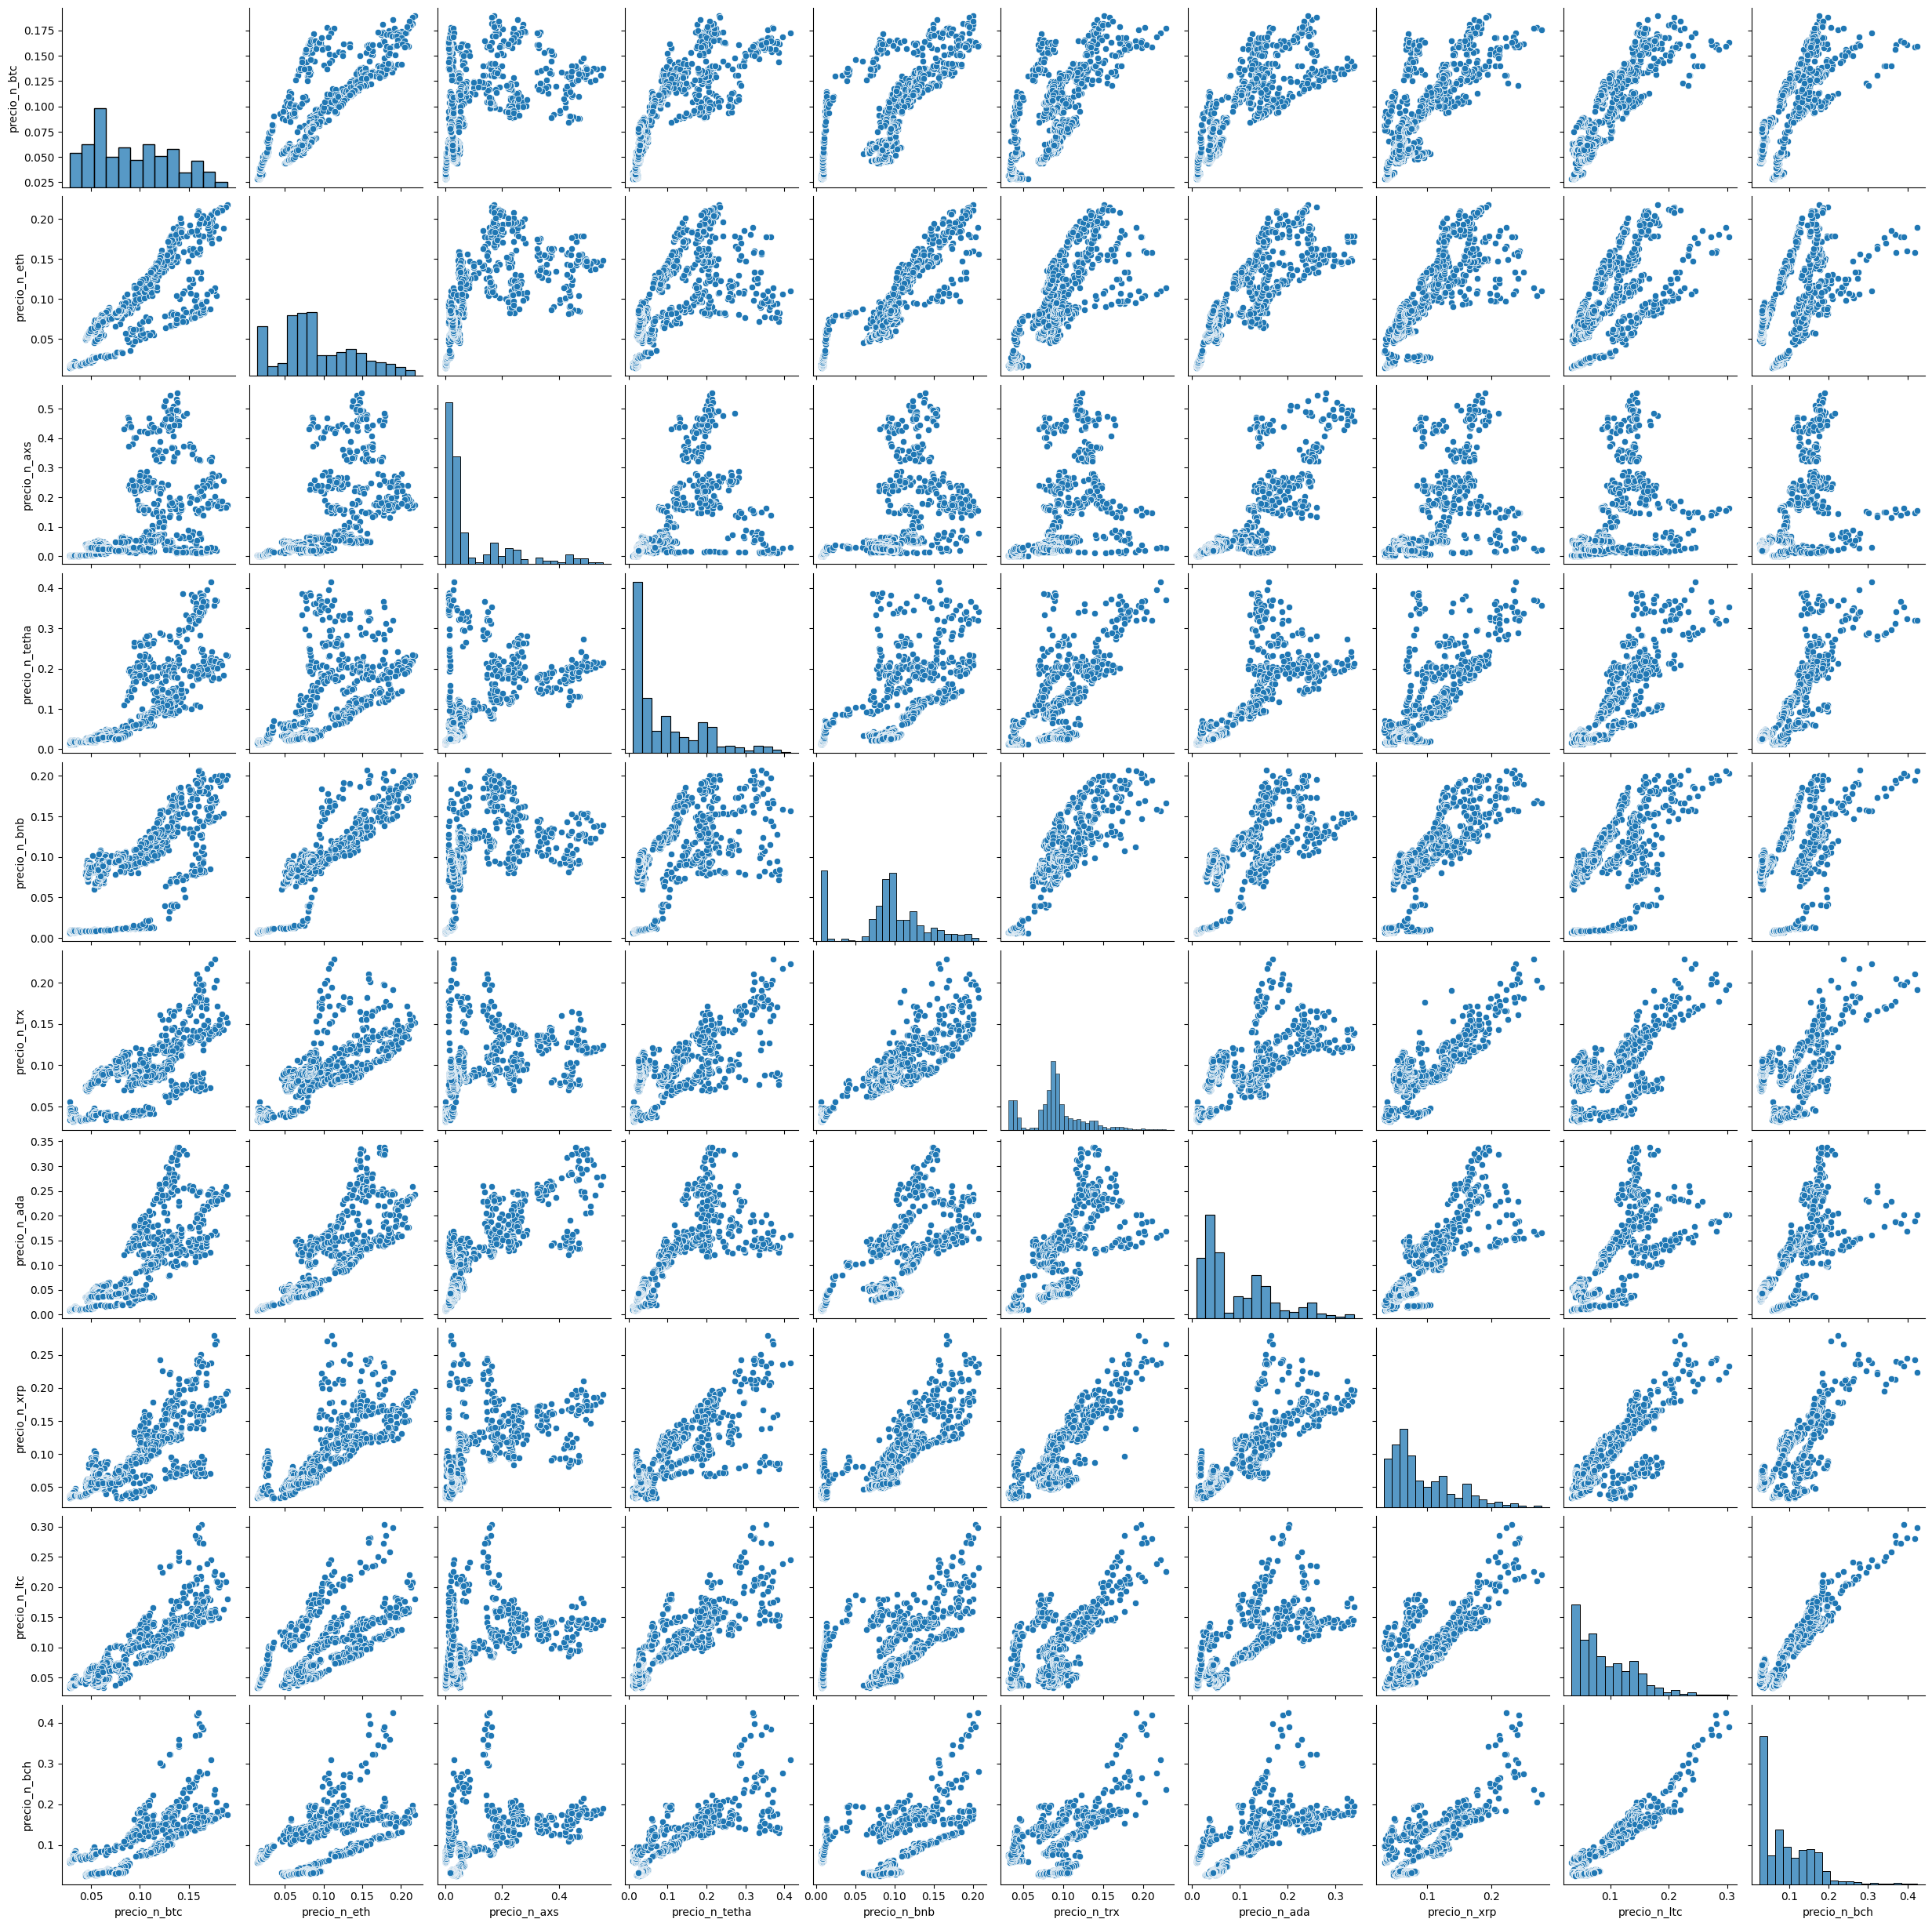

In [47]:
#Visualizacion de dispersion entre todos los tokens seleccionados para los ultimos tres años
var = 365*3
sns.pairplot(merged_df[merged_df["dia"] <= var][["precio_n_btc","precio_n_eth","precio_n_axs","precio_n_tetha","precio_n_bnb","precio_n_trx","precio_n_ada",
                        "precio_n_xrp","precio_n_ltc","precio_n_bch"]])




In [48]:
#Genracion de matriz de correlacion, con la cual cuantificar las relaciones que de manera visual se aprecian en elos diagramas anteriores.
correlation_matrix = merged_df[merged_df["dia"] <= var][["precio_n_btc","precio_n_eth","precio_n_axs","precio_n_tetha","precio_n_bnb",
                        "precio_n_trx","precio_n_ada", "precio_n_xrp","precio_n_ltc","precio_n_bch"]].corr()

In [49]:
correlation_matrix

precio_n_btc  precio_n_eth  precio_n_axs  precio_n_tetha   
precio_n_btc        1.000000      0.837559      0.511209        0.824186  \
precio_n_eth        0.837559      1.000000      0.636410        0.636372   
precio_n_axs        0.511209      0.636410      1.000000        0.553331   
precio_n_tetha      0.824186      0.636372      0.553331        1.000000   
precio_n_bnb        0.716191      0.903377      0.491741        0.610079   
precio_n_trx        0.695087      0.765232      0.454873        0.700532   
precio_n_ada        0.825466      0.842876      0.834184        0.797024   
precio_n_xrp        0.804060      0.817285      0.630219        0.822079   
precio_n_ltc        0.883786      0.673870      0.463349        0.877973   
precio_n_bch        0.773236      0.579303      0.537032        0.865661   

                precio_n_bnb  precio_n_trx  precio_n_ada  precio_n_xrp   
precio_n_btc        0.716191      0.695087      0.825466      0.804060  \
precio_n_eth        0.903377      0.765232      0.842876      0.817285   
precio_n_axs        0.491741      0.454873      0.834184      0.630219   
precio_n_tetha      0.610079      0.700532      0.797024      0.822079   
precio_n_bnb        1.000000      0.879208      0.719038      0.781126   
precio_n_trx        0.879208      1.000000      0.709680      0.813545   
precio_n_ada        0.719038      0.709680      1.000000      0.858466   
precio_n_xrp        0.781126      0.813545      0.858466      1.000000   
precio_n_ltc        0.589925      0.663039      0.757436      0.823955   
precio_n_bch        0.451695      0.562312      0.752195      0.811572   

                precio_n_ltc  precio_n_bch  
precio_n_btc        0.883786      0.773236  
precio_n_eth        0.673870      0.579303  
precio_n_axs        0.463349      0.537032  
precio_n_tetha      0.877973      0.865661  
precio_n_bnb        0.589925      0.451695  
precio_n_trx        0.663039      0.562312  
precio_n_ada        0.757436      0.752195  
precio_n_xrp        0.823955      0.811572  
precio_n_ltc        1.000000      0.934281  
precio_n_bch        0.934281      1.000000

REVISEMOS AHORA SUS RESPECTIVAS TENDENCIAS CON RESPECTO AL TIEMPO.

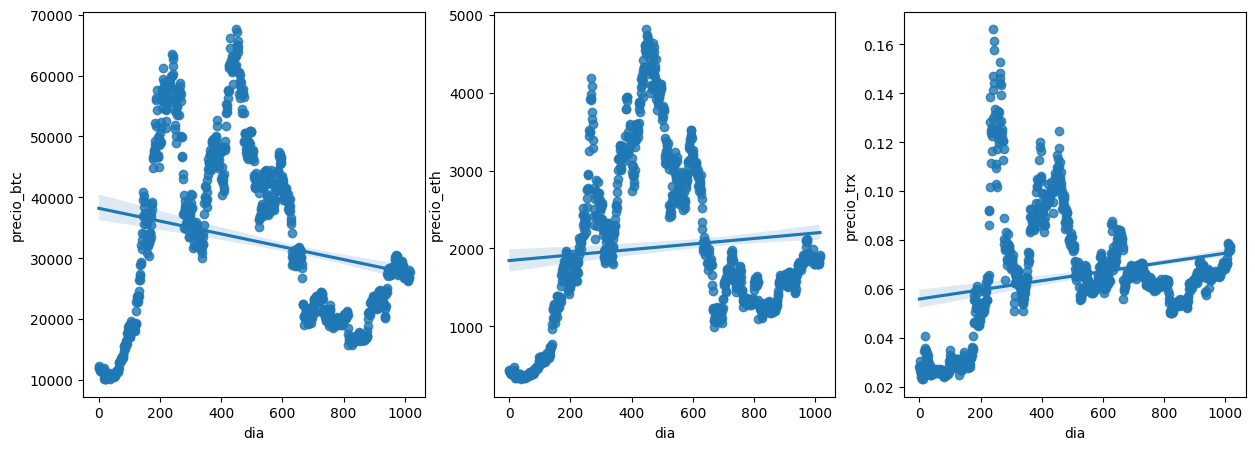

In [50]:
#BTC, ETH Y TRX.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_btc"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_eth"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_trx"], ax = ax3)
plt.show()



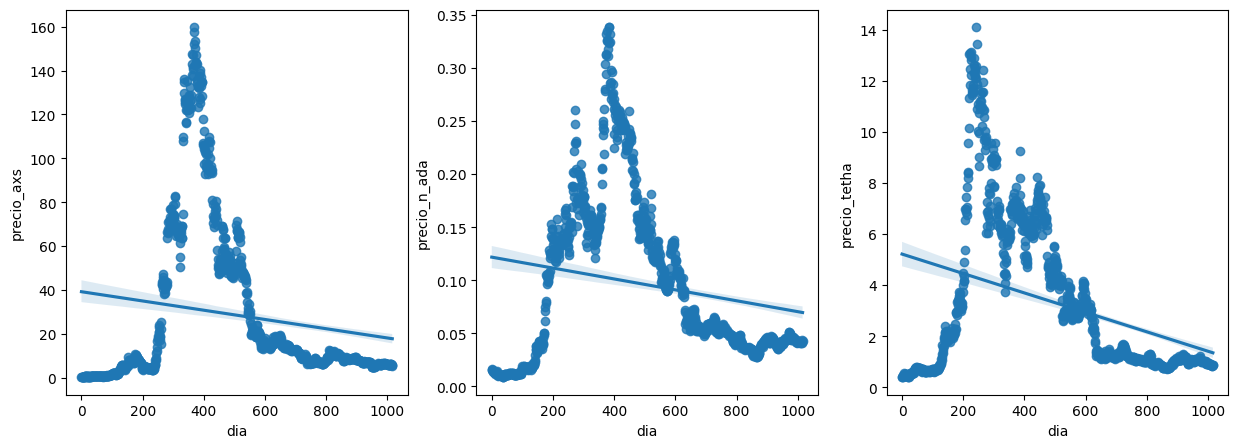

In [51]:
#AXS, ADA Y TETHA.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_axs"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_n_ada"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_tetha"], ax = ax3)
plt.show()

OBSERVEMOS AHORA EL COMPORTAMENTO DE LOS TOKENS BNB, XRL, BCH Y LTC

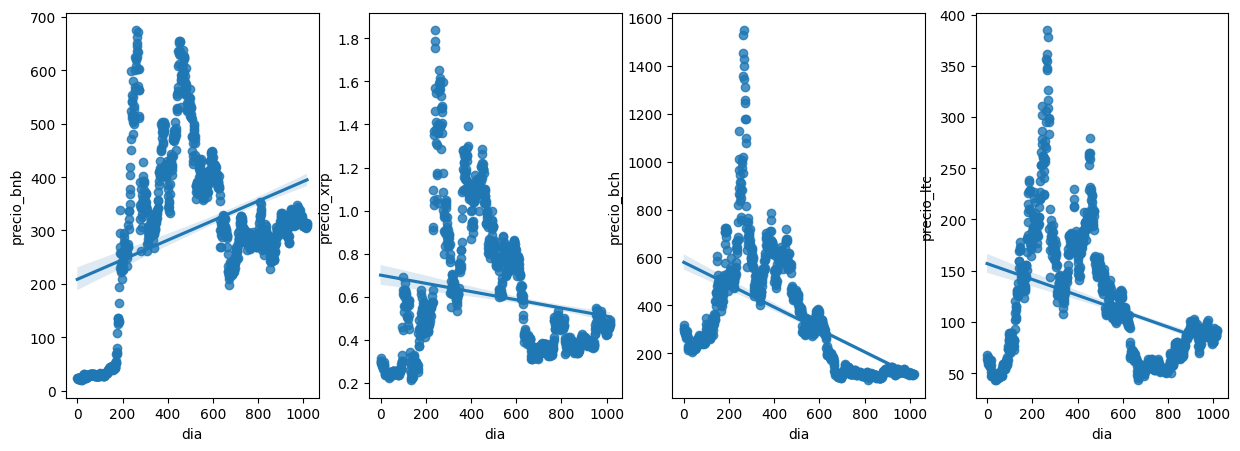

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_bnb"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_xrp"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_bch"], ax = ax3)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_ltc"], ax = ax4)
plt.show()

###Pairplot y tedencias para los ultimos 2 años.

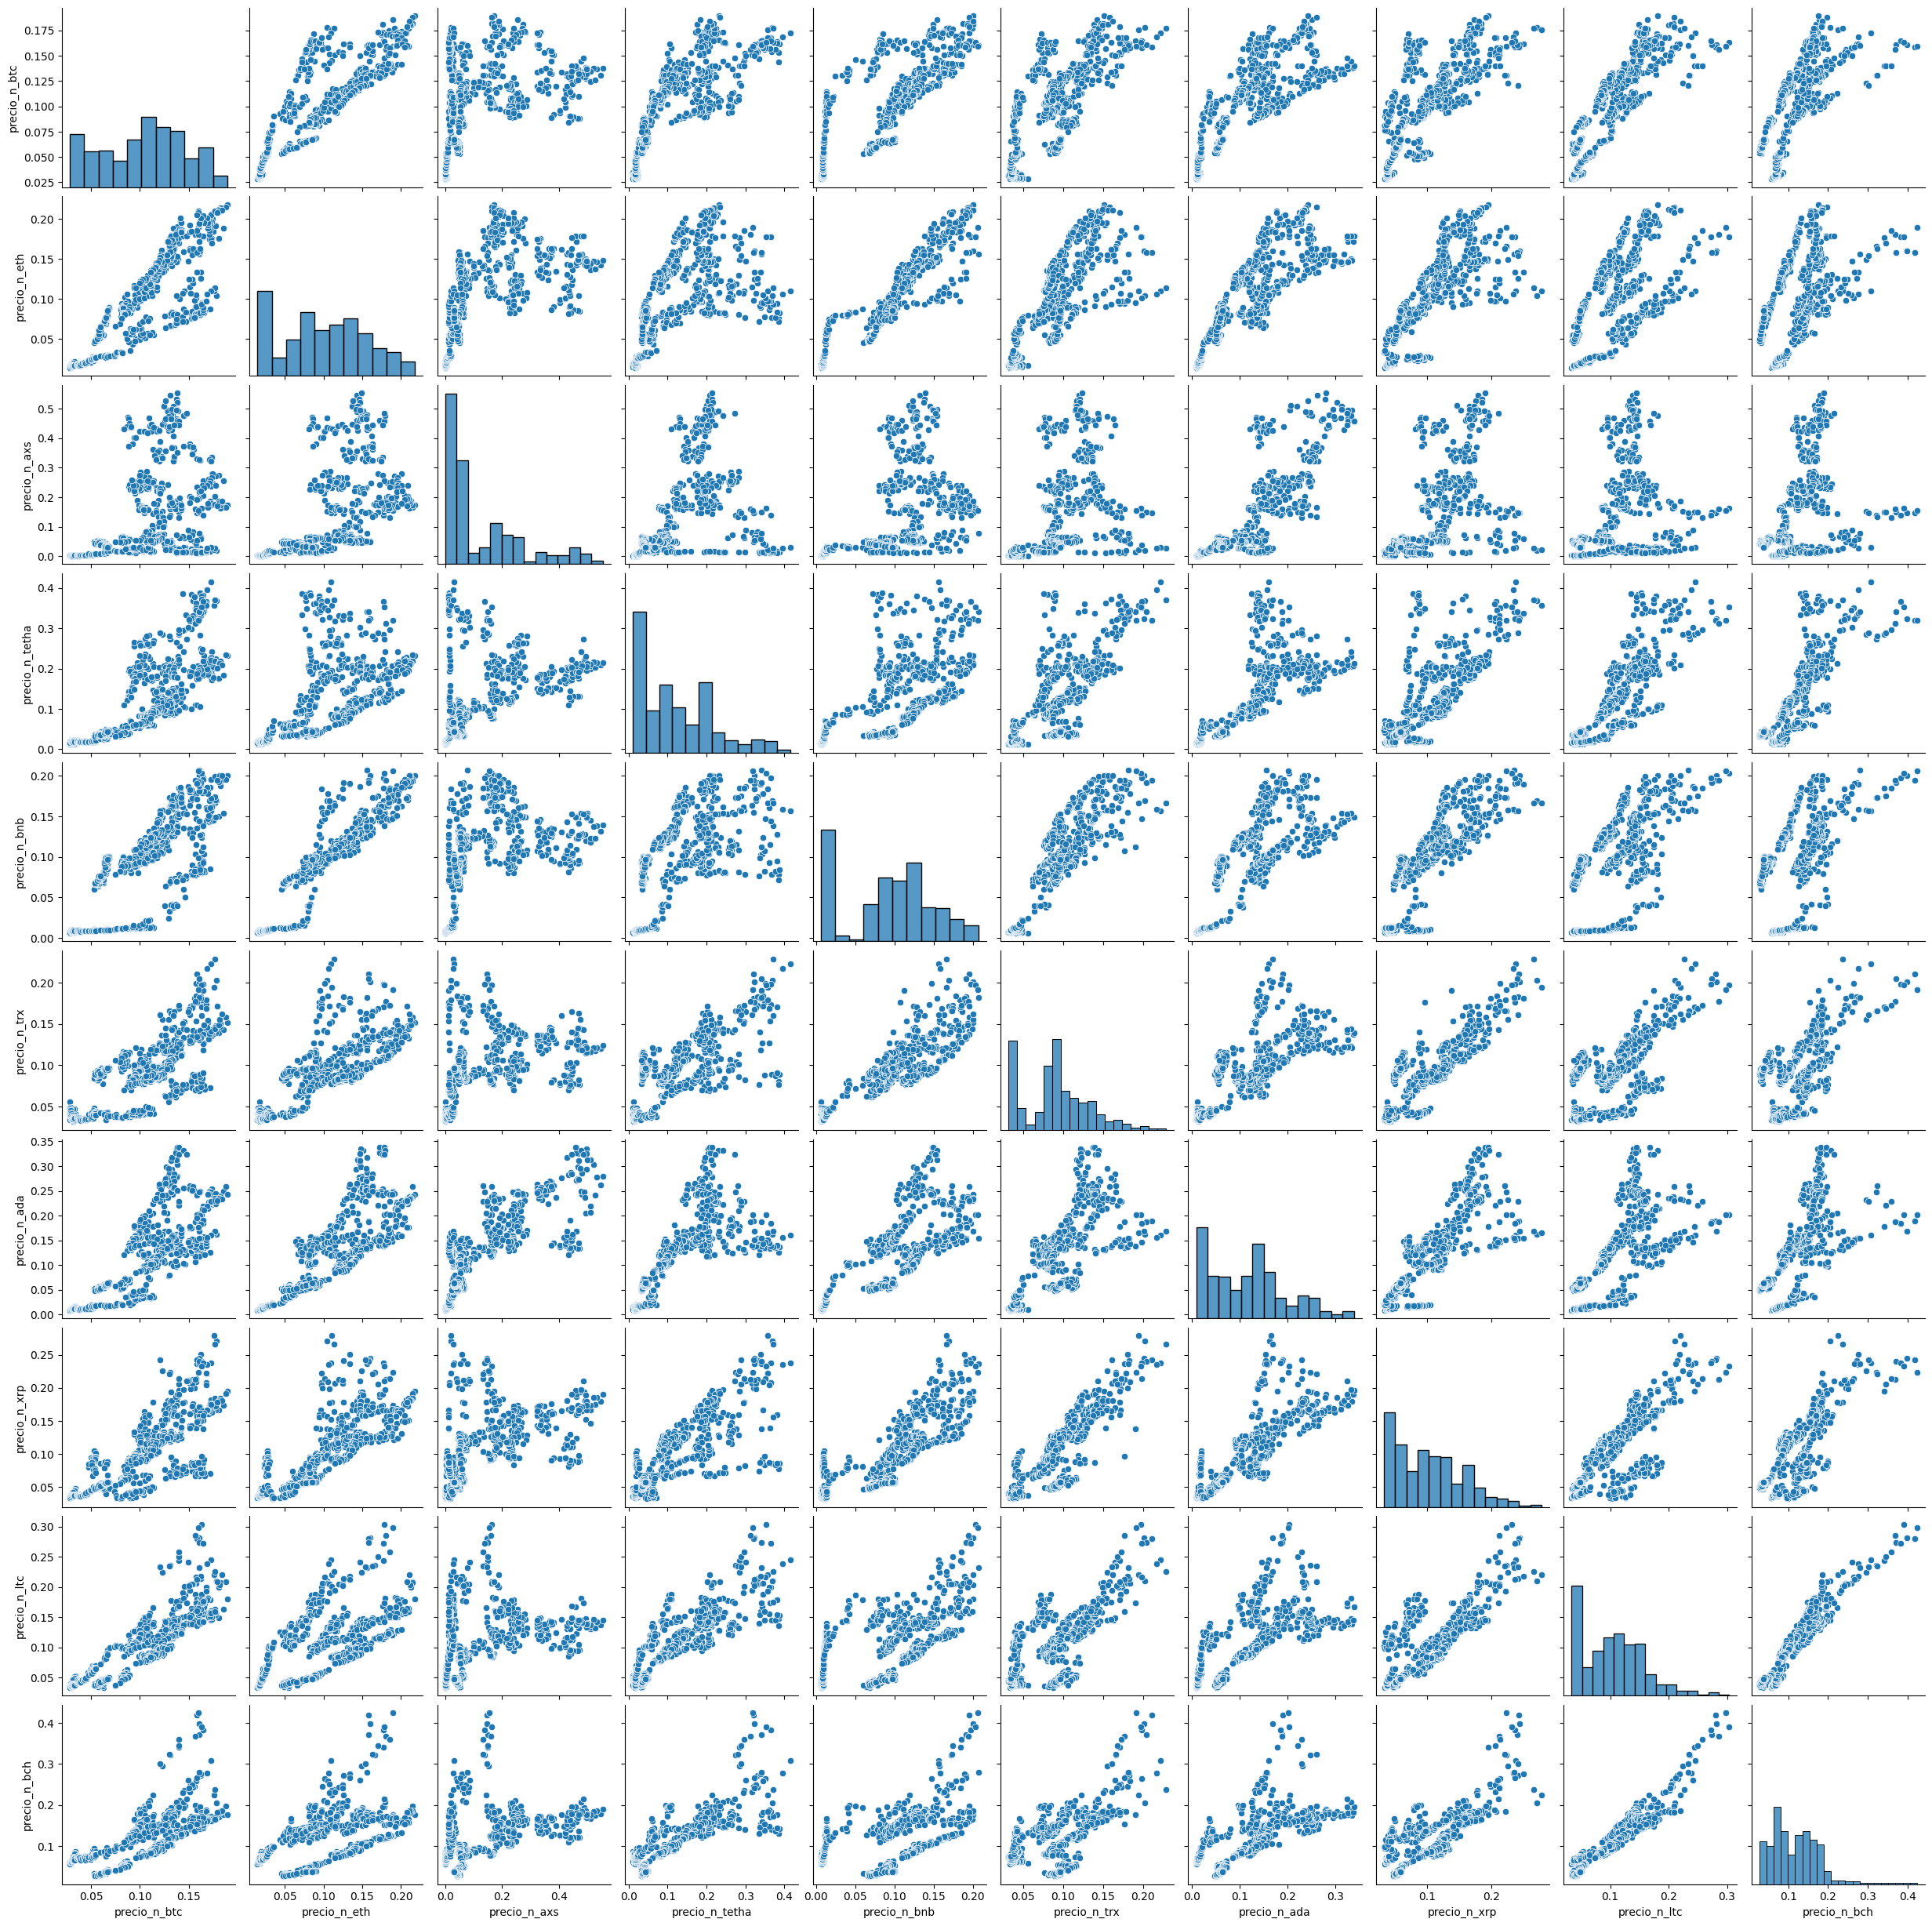

In [53]:
#Visualizacion de dispersion entre todos los tokens seleccionados para los ultimos dos años
var = 365*2
sns.pairplot(merged_df[merged_df["dia"] <= var][["precio_n_btc","precio_n_eth","precio_n_axs","precio_n_tetha","precio_n_bnb","precio_n_trx","precio_n_ada",
                        "precio_n_xrp","precio_n_ltc","precio_n_bch"]])


In [54]:
#Genracion de matriz de correlacion, con la cual cuantificar las relaciones que de manera visual se aprecian en elos diagramas anteriores.
correlation_matrix = merged_df[merged_df["dia"] <= var][["precio_n_btc","precio_n_eth","precio_n_axs","precio_n_tetha","precio_n_bnb",
                        "precio_n_trx","precio_n_ada", "precio_n_xrp","precio_n_ltc","precio_n_bch"]].corr()

In [55]:
correlation_matrix

precio_n_btc  precio_n_eth  precio_n_axs  precio_n_tetha   
precio_n_btc        1.000000      0.830929      0.429755        0.787361  \
precio_n_eth        0.830929      1.000000      0.606221        0.599792   
precio_n_axs        0.429755      0.606221      1.000000        0.471717   
precio_n_tetha      0.787361      0.599792      0.471717        1.000000   
precio_n_bnb        0.800325      0.936612      0.519815        0.677243   
precio_n_trx        0.747802      0.776878      0.466272        0.758287   
precio_n_ada        0.791636      0.839681      0.810009        0.746574   
precio_n_xrp        0.774521      0.805666      0.579513        0.794322   
precio_n_ltc        0.862445      0.640006      0.376925        0.859760   
precio_n_bch        0.706539      0.537287      0.437005        0.828924   

                precio_n_bnb  precio_n_trx  precio_n_ada  precio_n_xrp   
precio_n_btc        0.800325      0.747802      0.791636      0.774521  \
precio_n_eth        0.936612      0.776878      0.839681      0.805666   
precio_n_axs        0.519815      0.466272      0.810009      0.579513   
precio_n_tetha      0.677243      0.758287      0.746574      0.794322   
precio_n_bnb        1.000000      0.883737      0.791039      0.835080   
precio_n_trx        0.883737      1.000000      0.759894      0.855141   
precio_n_ada        0.791039      0.759894      1.000000      0.838154   
precio_n_xrp        0.835080      0.855141      0.838154      1.000000   
precio_n_ltc        0.642256      0.704557      0.713370      0.803457   
precio_n_bch        0.542759      0.647382      0.681344      0.794579   

                precio_n_ltc  precio_n_bch  
precio_n_btc        0.862445      0.706539  
precio_n_eth        0.640006      0.537287  
precio_n_axs        0.376925      0.437005  
precio_n_tetha      0.859760      0.828924  
precio_n_bnb        0.642256      0.542759  
precio_n_trx        0.704557      0.647382  
precio_n_ada        0.713370      0.681344  
precio_n_xrp        0.803457      0.794579  
precio_n_ltc        1.000000      0.944296  
precio_n_bch        0.944296      1.000000

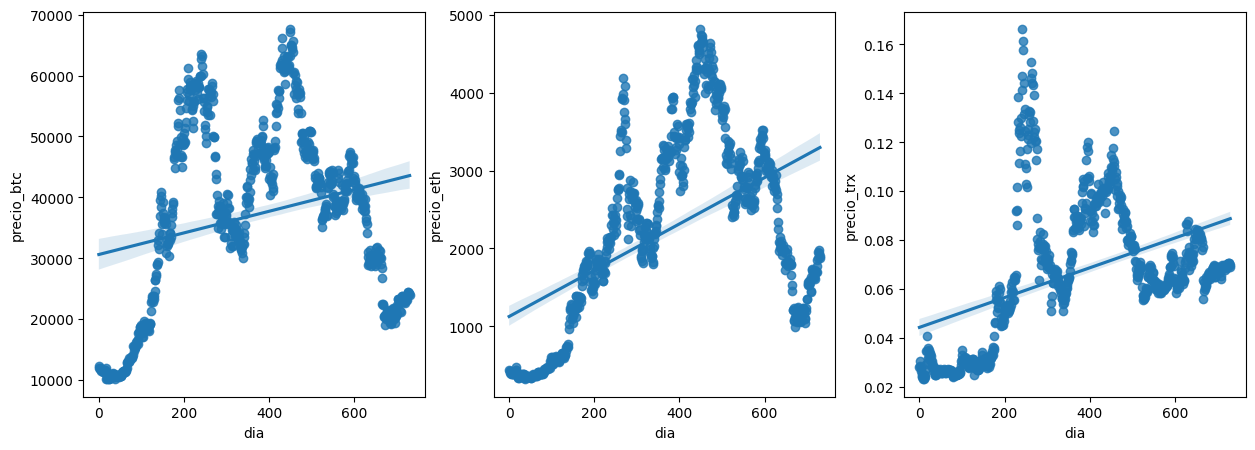

In [56]:
#BTC, ETH Y TRX.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_btc"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_eth"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_trx"], ax = ax3)
plt.show()

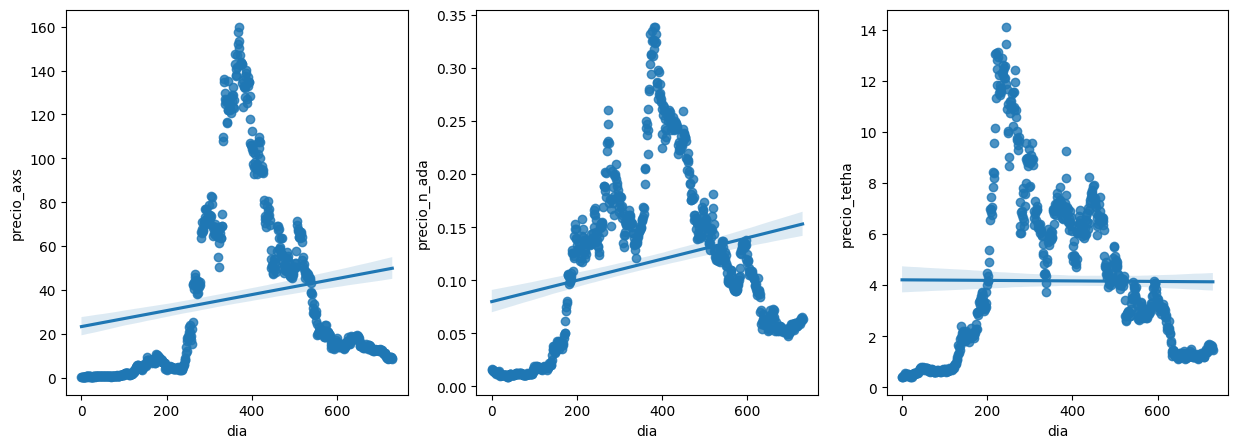

In [57]:
#AXS, ADA Y TETHA.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_axs"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_n_ada"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_tetha"], ax = ax3)
plt.show()

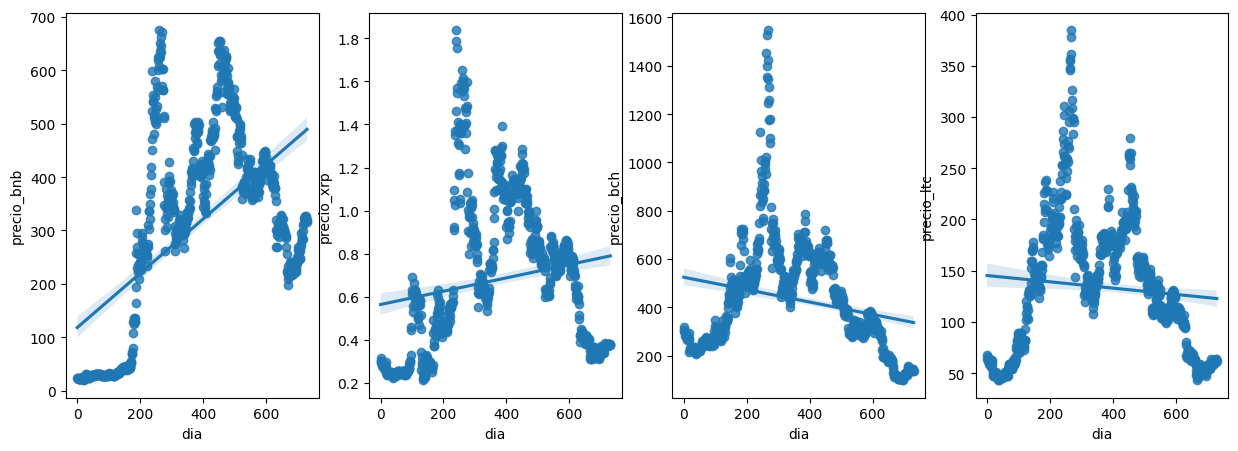

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_bnb"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_xrp"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_bch"], ax = ax3)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_ltc"], ax = ax4)
plt.show()

###Finalmente, pairplot y analisis de correlacion y tendencias para el periodo del ultimo año.

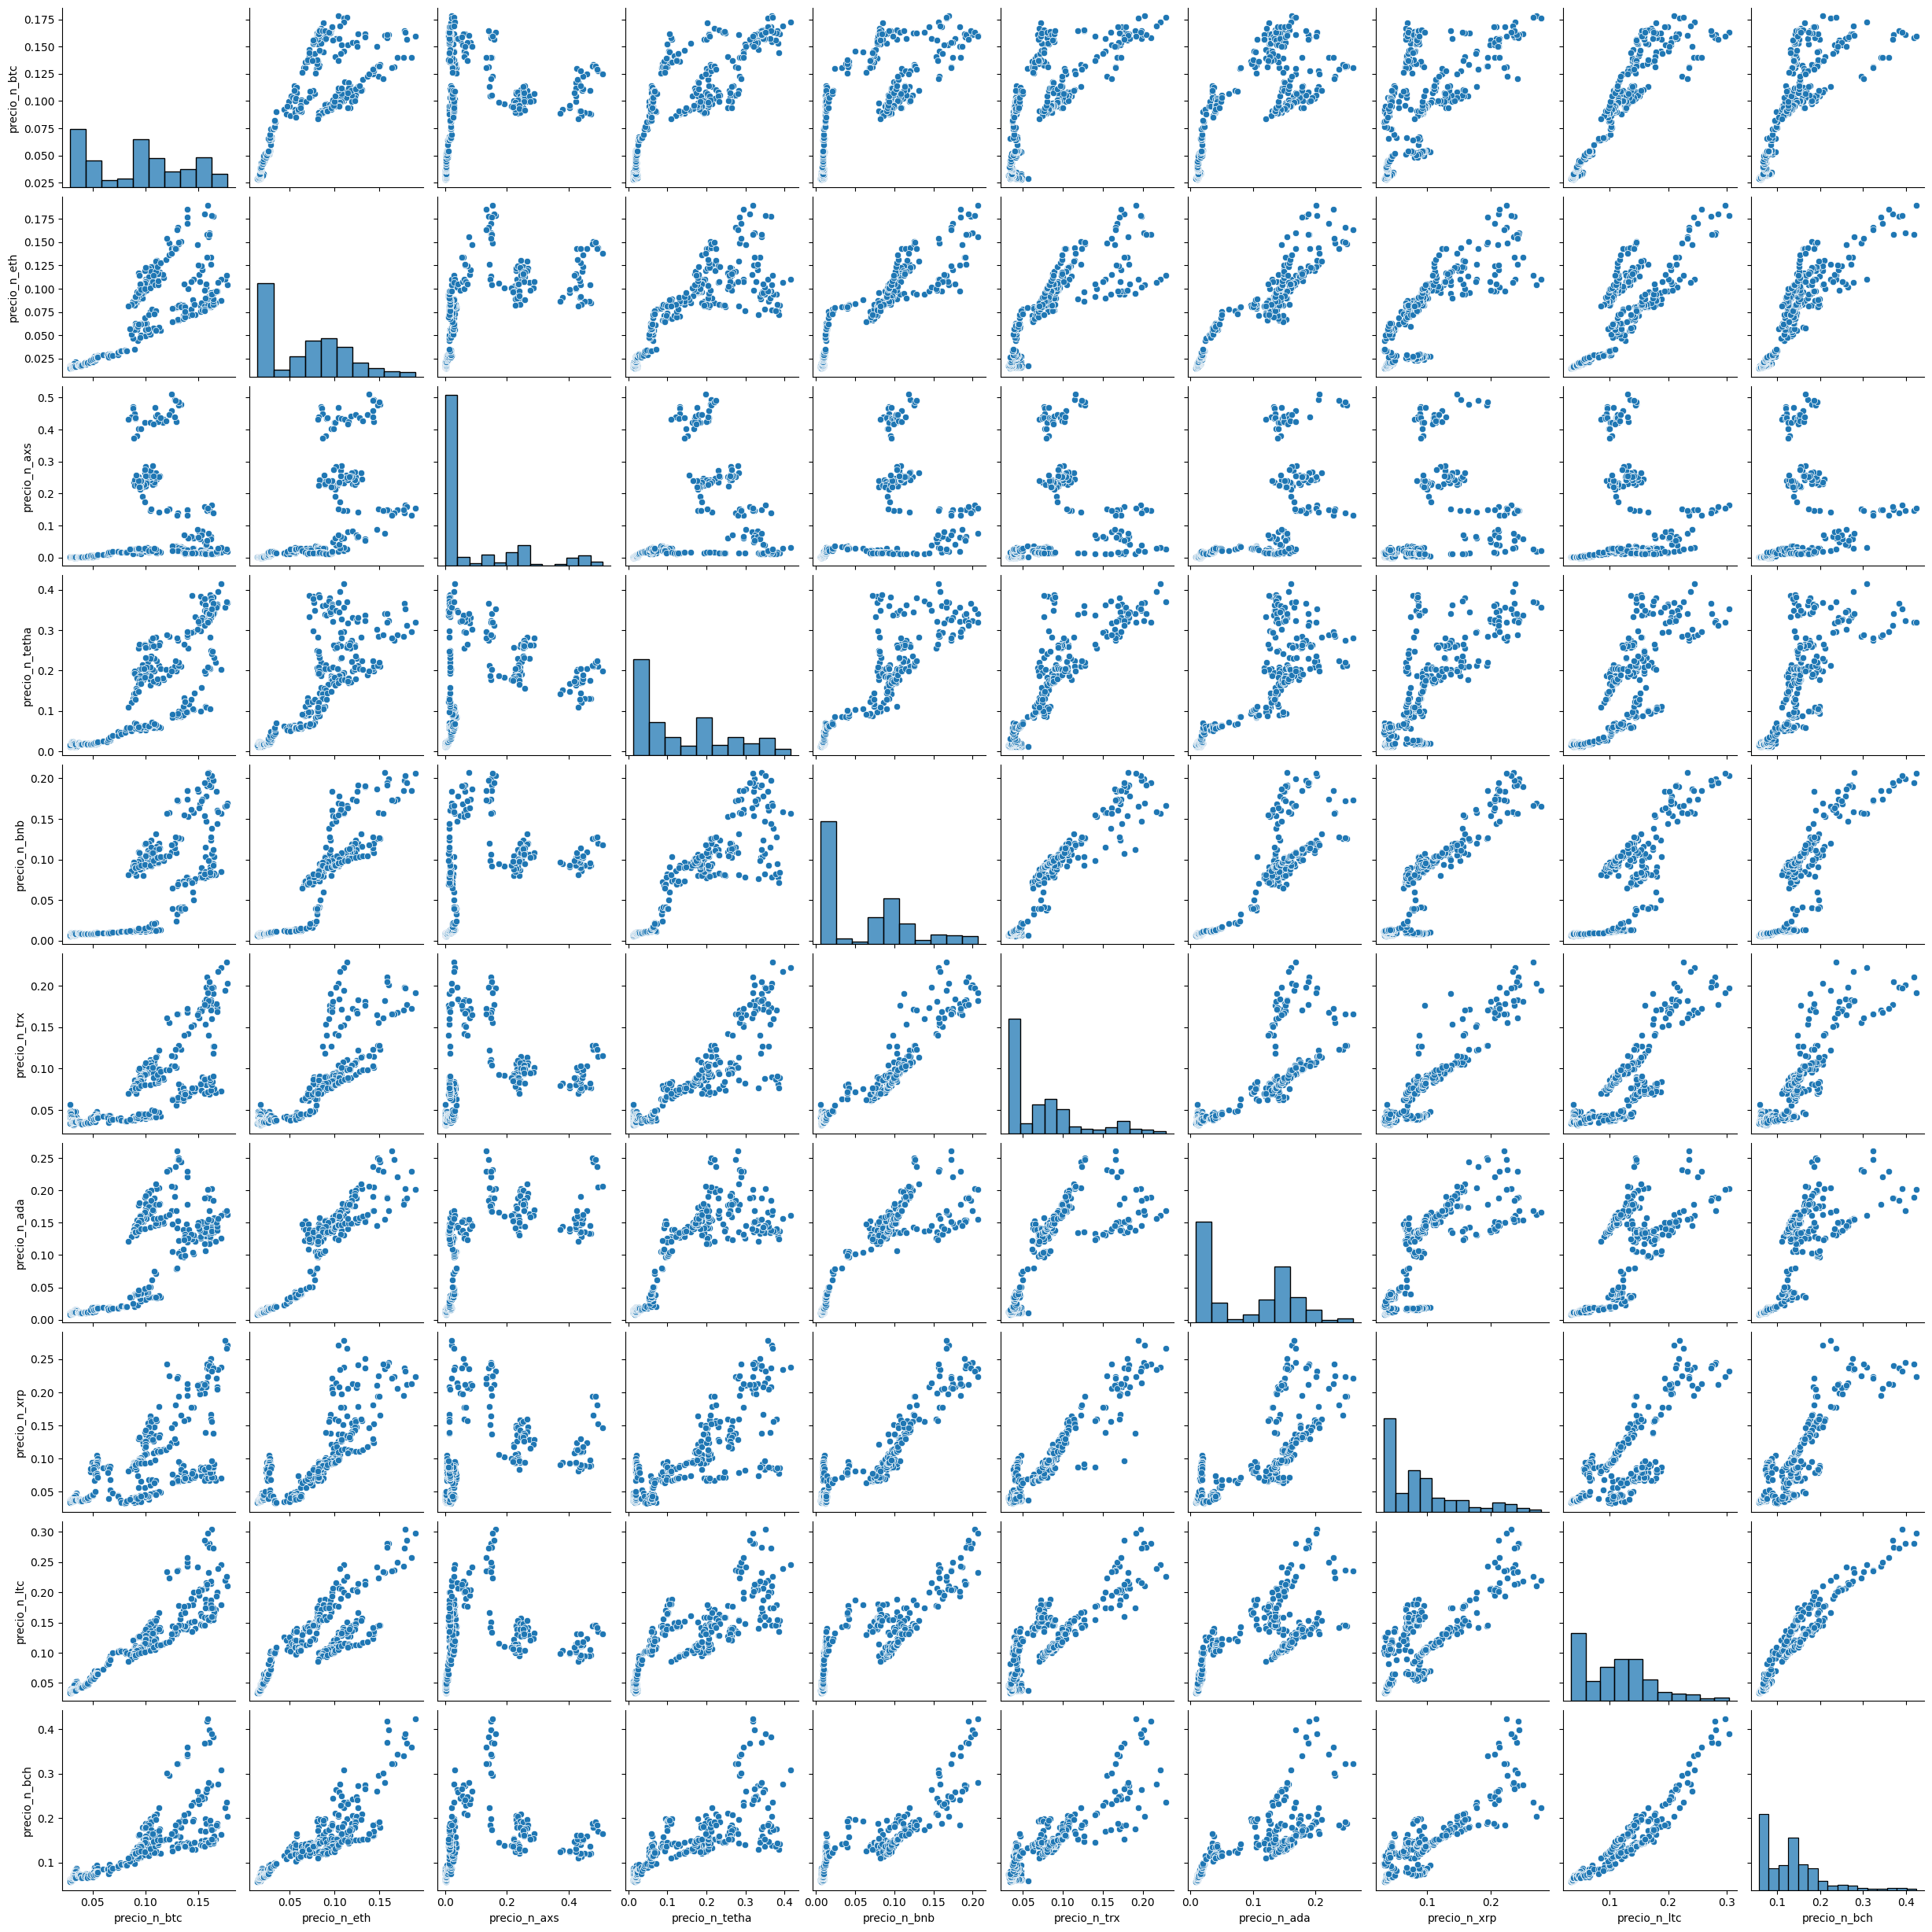

In [59]:
#Visualizacion de dispersion entre todos los tokens seleccionados para el ultimo año
var = 365*1
sns.pairplot(merged_df[merged_df["dia"] <= var][["precio_n_btc","precio_n_eth","precio_n_axs","precio_n_tetha","precio_n_bnb","precio_n_trx","precio_n_ada",
                        "precio_n_xrp","precio_n_ltc","precio_n_bch"]])

In [60]:
#Genracion de matriz de correlacion, con la cual cuantificar las relaciones que de manera visual se aprecian en elos diagramas anteriores.
correlation_matrix = merged_df[merged_df["dia"] <= var][["precio_n_btc","precio_n_eth","precio_n_axs","precio_n_tetha","precio_n_bnb",
                        "precio_n_trx","precio_n_ada", "precio_n_xrp","precio_n_ltc","precio_n_bch"]].corr

In [63]:
correlation_matrix

<bound method DataFrame.corr of      precio_n_btc  precio_n_eth  precio_n_axs  precio_n_tetha  precio_n_bnb   
0        0.033338      0.019653      0.000504        0.011680      0.007194  \
1        0.034376      0.019499      0.000504        0.011376      0.007210   
2        0.033472      0.019139      0.000467        0.012897      0.007040   
3        0.032866      0.018435      0.000495        0.011989      0.006836   
4        0.033226      0.018884      0.000491        0.013410      0.007071   
..            ...           ...           ...             ...           ...   
361      0.124635      0.138221      0.509945        0.198988      0.118019   
362      0.133660      0.150681      0.478100        0.210812      0.125711   
363      0.131900      0.148203      0.475603        0.212835      0.125439   
364      0.131721      0.150071      0.486581        0.219939      0.126674   
365      0.128939      0.142990      0.490571        0.224128      0.127764   

     precio_n_trx  

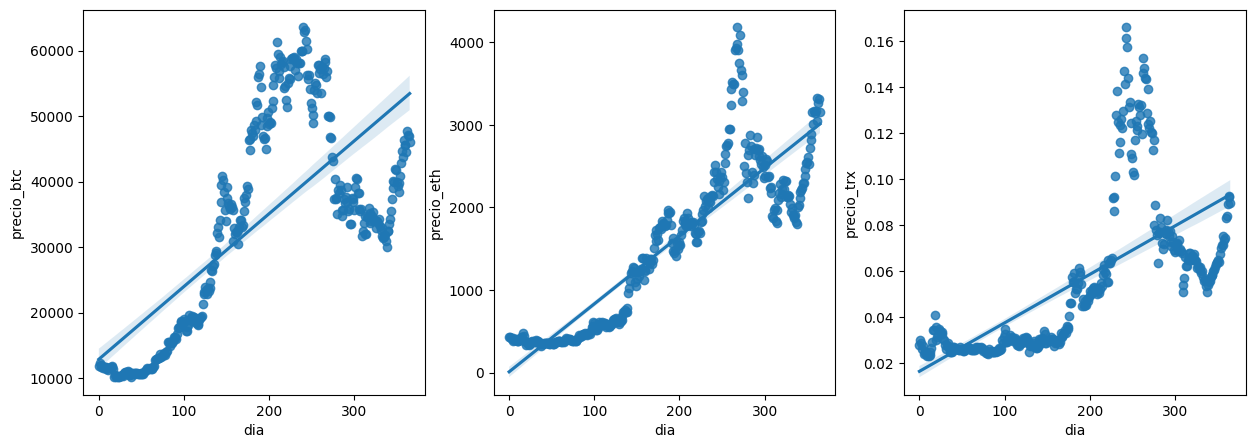

In [64]:
#BTC, ETH Y TRX.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_btc"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_eth"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_trx"], ax = ax3)
plt.show()

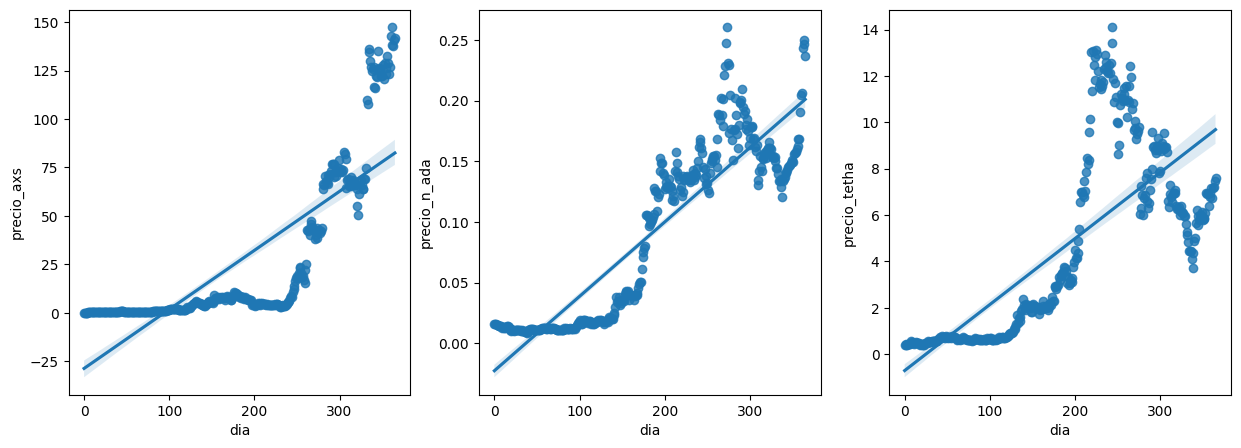

In [65]:
#AXS, ADA Y TETHA.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_axs"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_n_ada"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_tetha"], ax = ax3)
plt.show()

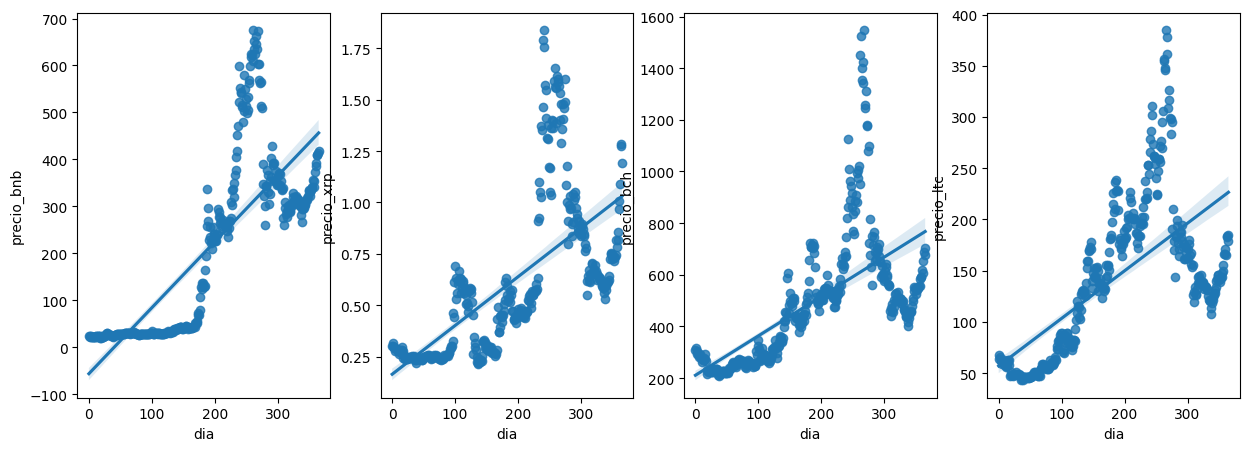

In [66]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))
#["df_btc","df_eth","df_axs","df_tetha","df_bnb","df_trx","df_ada","df_xrl","df_ltc","df_bch"]
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_bnb"], ax = ax1)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_xrp"], ax = ax2)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_bch"], ax = ax3)
sns.regplot(x=merged_df[merged_df["dia"] <= var]["dia"], y=merged_df[merged_df["dia"] <= var]["precio_ltc"], ax = ax4)
plt.show()

### ANALICEMOS LA POSIBILIDAD DE AUTOCORRELACION EN BITCOIN

###Con retraso de un dia

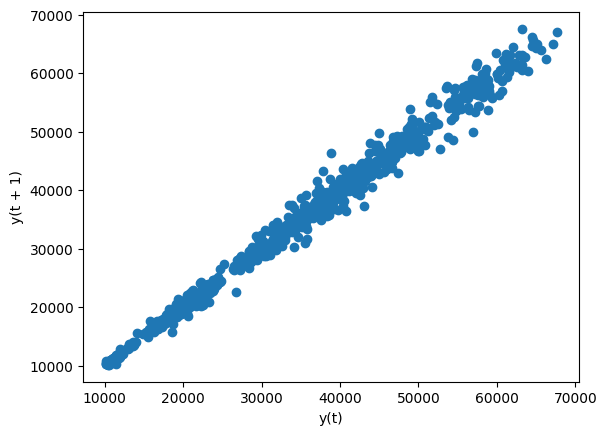

In [68]:
retraso = 1
pd.plotting.lag_plot(merged_df["precio_btc"], lag = retraso)
plt.show()

###Con retraso de 7 dias.

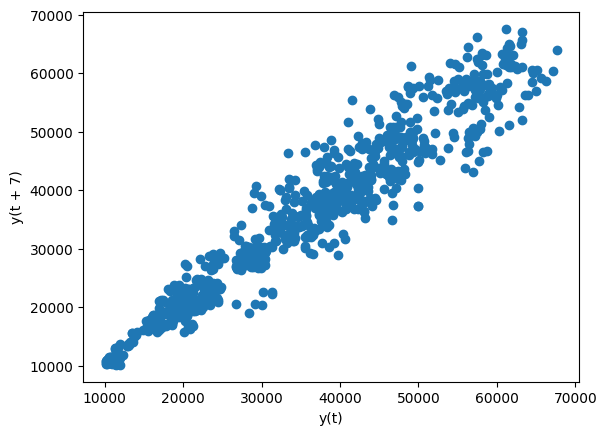

In [69]:
retraso = 7
pd.plotting.lag_plot(merged_df["precio_btc"], lag = retraso)
plt.show()

###Con retraso de 30 dias.

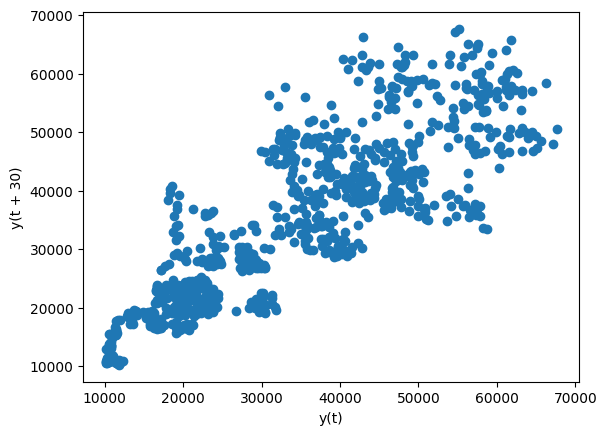

In [70]:
retraso = 30
pd.plotting.lag_plot(merged_df["precio_btc"], lag = retraso)
plt.show()

Con retraso de 90 dias.

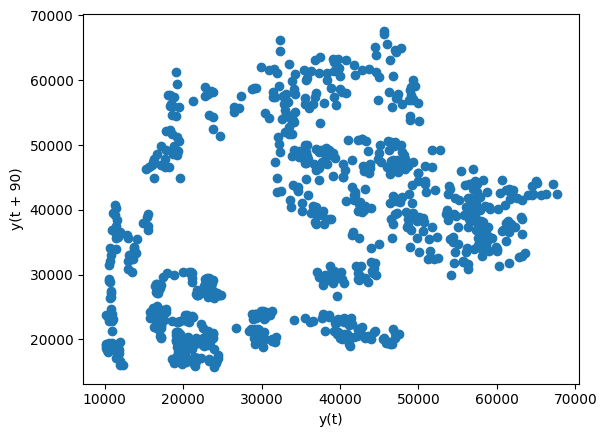

In [71]:
retraso = 90
pd.plotting.lag_plot(merged_df["precio_btc"], lag = retraso)
plt.show()

###En lo anterior se quizo identificar estacionalidad en la serie de tiempo mas importante, la de bitcoin. Para ello debia identificarse "linealidad" en algun "retraso" posterior a 1. Para un retraso de 7 (semanal), 30 (mensual) y 90 (trimestral) lo que se identifico fue una dispersion cada vez mayor, razon por la cual de antemano se deduce que no vamos a encontrar autocorrelacion ciclica, es decir, las series de tiempo inherente a los precios de bitcoin y en consecuencia del resto de las cripto no tiene estacionalidad al menos hasta periodos de 90 dias. 